### <b>**Binary classification using logistic regression** </b>

Assuming that the loan approval for a certain amount depends only on income, we are wondering an individual with an income of \$47000 will qualify for the loan.<br>
We want given the following data from other customers.

<br> __Remark: we are not splitting datasets into train/test for this simple example. But in real life examples we always do.__

  <br>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt, seaborn as sns
%matplotlib inline
import sklearn
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.preprocessing import StandardScaler
import tabulate

In [2]:
income = np.array([1000, 5000, 10000, 11000, 12000, 10000, 10000, 1000, 15000, 20000, 20000, 25000, 27000, 30000, 31000, 32000, 35000,
                  40000, 50000, 55000, 63000, 70000, 75000, 80000, 90000, 85000, 90000, 100000, 110000, 111000, 100000, 120000, 130000, 150000, 200000])
loan_status = np.array(['Not approved', 'Not approved','Not approved','Not approved','Not approved','Not approved','Not approved','Not approved','Not approved','Not approved','Not approved','Not approved','Not approved','Not approved','Not approved','Not approved','Not approved','Not approved','Not approved','Not approved','Approved','Approved','Approved','Approved','Approved','Approved','Approved','Approved','Approved','Approved','Approved','Approved','Approved','Approved','Approved'])


In [3]:
df = pd.DataFrame({'Income':income,'Loan status':loan_status})
df.sample(2)

,Income,Loan status
16,35000,Not approved
12,27000,Not approved


In [4]:
# Scale the income using STandardScaler
scaler = StandardScaler()

def sigmoid(income):
    return 1 / (1 + np.exp(-income))

<br> __Map "Approved" to 1 and "Not approved" to 0.__

In [5]:
df['Loan status']=df['Loan status'].map({'Approved':1,'Not approved': 0})
print(f"Approved: {df[df['Loan status'] == 1].shape[0]}")
print(f"Not approved: {df[df['Loan status'] == 0].shape[0]}")
df.head(2)

Approved: 15
Not approved: 20


,Income,Loan status
0,1000,0
1,5000,0


In [6]:
scaled_income = scaler.fit_transform(df['Income'].values.reshape(-1, 1))
scaled_income_sigmoid = sigmoid(scaled_income)

In [7]:
scaled_income.min(),scaled_income.max()

(np.float64(-1.1764112672276685), np.float64(2.9639143902966927))

In [8]:
sigmoid_x = np.linspace(-4, +4, num=80)
sigmoid_y = sigmoid(sigmoid_x)
sigmoid_x = 100_000 * sigmoid_x

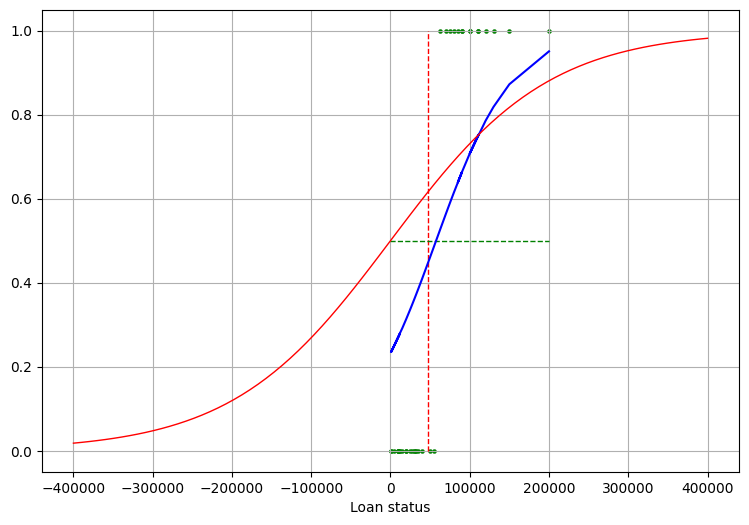

In [9]:
plt.figure(figsize=(9,6))
plt.scatter(x=df['Income'],y=df['Loan status'], c="g", s=10, linewidths=0.1)
plt.vlines(x=47000, ymax=1, ymin=0, colors='r', linestyles='--', linewidths=1)
plt.hlines(y=0.5,xmin=0,xmax=200_000,colors='g',linestyles='--', linewidths=1)
plt.plot(income, scaled_income_sigmoid, label='Sigmoid Curve', color='blue')
plt.plot(sigmoid_x, sigmoid_y, label="Sigmoid", color="r", linewidth=1)
plt.xlabel('Income')
plt.xlabel('Loan status')
plt.grid(True)
plt.show()

<br> __Run linear regression__

In [10]:
X = df[['Income']]
Y = df['Loan status']

In [11]:
Y[:3]

0    0
1    0
2    0
Name: Loan status, dtype: int64

In [12]:
myreg = LinearRegression().fit(X,Y)

In [13]:
print(f"Intercept: {myreg.intercept_:.4f}, Coefficients: {myreg.coef_[0]:.6f}")

Intercept: -0.0773, Coefficients: 0.000009


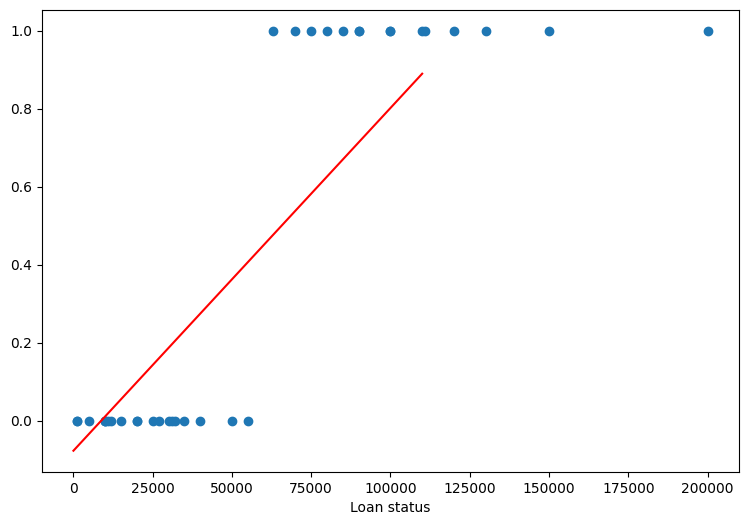

In [14]:
plt.figure(figsize=(9,6))
plt.scatter(x=df['Income'],y=df['Loan status'])
xcoord = np.linspace(0,110000,num=2)
plt.plot(xcoord,myreg.intercept_+myreg.coef_[0]*xcoord,color='r')
plt.xlabel('Income')
plt.xlabel('Loan status')
plt.show()

__Not good!__

Instead of linear fit $y = \theta_1x + \theta_0$, we use a logistic fit, $y = f(\theta_1x + \theta_0)$, where $f$ is the logistic function:
<div align="left">

$$f(z) = \frac{1}{1+e^{-z}}$$

So we seek $\theta_0$ and $\theta_1$ such that the following graph best fits our data points:
$$ y = \frac{1}{1+e^{-(\theta_1x + \theta_0)}}\ .$$


__Simple logistic regression:__ <br>
Defining $n$ as the number of samples and the error as
$$e_i = y_i - \frac{1}{1+e^{-(\theta_1x_i + \theta_0)}}\ ,$$
we seek $\theta_0$ and $\theta_1$ such that $SSE = \sum_{i=1}^{n}e_i^2$ is minimum.<br>

$SSE = \sum_{i=1}^{n}e_i^2$ is called the cost function.

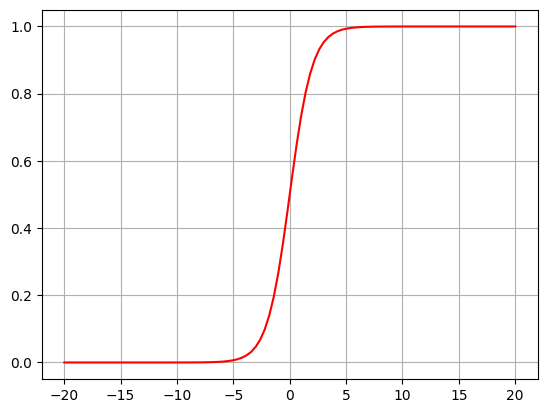

In [15]:
xcoord2 = np.linspace(-20, 20, 100)
plt.plot(xcoord2, sigmoid(xcoord2),color='r')
plt.grid(True)
plt.show()


In [16]:
my_logistic = LogisticRegression().fit(scaled_income, df['Loan status'])
my_logistic.intercept_,my_logistic.coef_

(array([-0.25612452]), array([[2.57475533]]))

In [17]:
predictions = my_logistic.predict(scaled_income)
predictions

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [18]:
(predictions == df['Loan status']).sum()

np.int64(35)

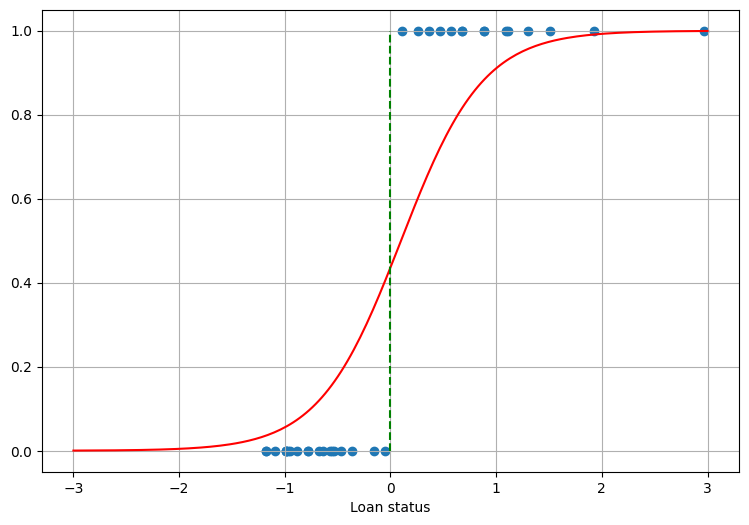

In [19]:
plt.figure(figsize=(9,6))
plt.scatter(x=scaled_income, y=df['Loan status'])
xcoord = np.linspace(-3,3,num=200)
plt.plot(xcoord, sigmoid(my_logistic.intercept_ +
         my_logistic.coef_[0]*xcoord), color='r')
plt.vlines(x=0,ymax=1,ymin=0,colors='g',linestyles='--')
plt.xlabel('Income')
plt.xlabel('Loan status')
plt.grid(True)
plt.show()

For prediction, compute the value on the curve and choose a criterion: if vluae<0.5, "not approved. If value >= 0.5, "Approved".

In [20]:
X_test = [[10000]]
X_test_scaled = scaler.transform(X_test)


In [21]:
print("Prediction: ", my_logistic.predict(X_test_scaled))
print("Probability: ", my_logistic.predict_proba(X_test_scaled))

Prediction:  [0]
Probability:  [[0.94283613 0.05716387]]


In [22]:
# Creates an array with [1-value of the curve, value of the curve]
# ie: [Probability that loan_status = 0, Probability that loan_status = 1]
test_data = np.array([[10_000, 20_000, 50_000, 100_000, 150_000, 200_000]]).reshape(-1, 1)
test_data_scaled = scaler.transform(test_data)
print("Prediction: ", my_logistic.predict(test_data_scaled))
probabilities = my_logistic.predict_proba(test_data_scaled)
probabilities_df = pd.DataFrame(probabilities, columns=["class-0", "class-1"])
probabilities_df["class-0"] = probabilities[:, 0]
probabilities_df["class-1"] = probabilities[:, 1]
probabilities_df["total"] = probabilities_df["class-0"] + probabilities_df["class-1"]
probabilities_df["Income"] = test_data.flatten()
print(tabulate.tabulate(probabilities_df, headers=["class-0", "class-1", "total", "Income"], tablefmt="grid"))

Prediction:  [0 0 0 1 1 1]
+----+------------+-----------+---------+----------+
|    |    class-0 |   class-1 |   total |   Income |
+====+============+===========+=========+==========+
|  0 | 0.942836   | 0.0571639 |       1 |    10000 |
+----+------------+-----------+---------+----------+
|  1 | 0.90613    | 0.0938697 |       1 |    20000 |
+----+------------+-----------+---------+----------+
|  2 | 0.659303   | 0.340697  |       1 |    50000 |
+----+------------+-----------+---------+----------+
|  3 | 0.117297   | 0.882703  |       1 |   100000 |
+----+------------+-----------+---------+----------+
|  4 | 0.00904232 | 0.990958  |       1 |   150000 |
+----+------------+-----------+---------+----------+
|  5 | 0.00062619 | 0.999374  |       1 |   200000 |
+----+------------+-----------+---------+----------+


# Logictic regression with multiple features

__Multiple logistic regression:__

Defining $n$ as the number of samples and "p" as the number of features, we seek $p$ parameters $\theta_0,\theta^1,...,\theta^p$ such that the following graph best fits our data points:
$$ y = \frac{1}{1+e^{-(\theta^0 + \theta_1x^1 + \theta_2x^2 + ... + \theta_px^p)}}\ .$$

__Simple logistic regression:__ <br>
Defining $n$ as the number of samples, "p" as the number of features and the error as
$$e_i = y_i - \frac{1}{1+e^{-(\theta^0 + \theta_1x_i^1 + \theta_2x_i^2 + ... + \theta_px_i^p)}}\ ,$$

we seek $p$ parameters $\theta^0,\theta^1,...,\theta^p$ such that $SSE = \sum_{i=1}^{n}e_i^2$ is minimum.<br>
<br>
$SSE = \sum_{i=1}^{n}e_i^2$ is called the cost function. Note that there are other types of cost functions, such as the logloss.

In [23]:
from sklearn.datasets import load_iris

# Load the iris dataset
iris = load_iris()
df=pd.DataFrame(iris.data,columns=iris.feature_names)
df["species"] = iris.target
df = df[df["species"]>0]
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
50,7.0,3.2,4.7,1.4,1
51,6.4,3.2,4.5,1.5,1
52,6.9,3.1,4.9,1.5,1
53,5.5,2.3,4.0,1.3,1
54,6.5,2.8,4.6,1.5,1


In [24]:
species_unique = df["species"].unique()
print("Possible classes: ", species_unique)

Possible classes:  [1 2]


In [25]:
df.shape

(100, 5)

In [26]:
X=df.drop(columns=["species"])
Y=df["species"]

In [27]:
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
50,7.0,3.2,4.7,1.4
51,6.4,3.2,4.5,1.5
52,6.9,3.1,4.9,1.5
53,5.5,2.3,4.0,1.3
54,6.5,2.8,4.6,1.5


In [28]:
Y.head()

50    1
51    1
52    1
53    1
54    1
Name: species, dtype: int64

In [29]:
# Standardize X
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
Xsc = sc.fit_transform(X)

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(Xsc, Y, test_size=0.3, random_state=42)
X_train_1, X_train_2, Y_train_1, Y_train_2 = train_test_split(X, Y, test_size=0.5, random_state=42)

In [31]:
X_train[:2]

array([[-0.54889074,  0.38660992, -0.8594661 , -0.41643072],
       [-0.09400891,  0.08457092, -0.73772869, -0.88964745]])

In [32]:
# Declare logistic regression, Fit the model in train and test data
lr= LogisticRegression().fit(X_train,Y_train)

In [33]:
# lr.score calls `predict` and then applies `score`
test_score = lr.score(X_test, Y_test)
train_score = lr.score(X_train, Y_train)
print(f"Test accuracy: {test_score:.2f}, Train accuracy: {train_score:.2f}")
print(f"Intercept: {lr.intercept_}, Coefficients: {lr.coef_.round(2)}")

Test accuracy: 0.90, Train accuracy: 0.99
Intercept: [0.04455178], Coefficients: [[-0.14 -0.76  2.1   2.1 ]]


__Remark:__ There are 27 out of 30 predictions accurate, The accuracy is $$ 27/30 = 90\%$$

In [34]:
print(f"Intercept: {lr.intercept_}, Coefficients: {lr.coef_.round(4)}")

Intercept: [0.04455178], Coefficients: [[-0.1418 -0.763   2.0963  2.0956]]


In [51]:
y_test_pred = lr.predict(X_test)
y_test_pred[:10], Y_test[:10]

(array([[1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [0.],
        [1.]], dtype=float32),
 133    2
 103    2
 120    2
 95     1
 94     1
 89     1
 72     1
 130    2
 60     1
 50     1
 Name: species, dtype: int64)

In [35]:
import sys
import os

# Add the relative path to sys.path
sys.path.append(os.path.abspath("../implementation"))

In [36]:
from unified_regression import LogisticRegression as MyLogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [37]:
my_pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("logistic", MyLogisticRegression(alpha=0.2, max_iter=10_000_000))
]).fit(X_train_1, Y_train_1)

X: (50, 4), y: (50,)


/Users/xyz-ai/Developer/python3-code/ml/regression/implementation/unified_regression.py:121: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


In [38]:
lr = my_pipeline.named_steps['logistic']
print(f"Intercept: {lr.intercept_:.4f}, Coefficients: {lr.coef_.round(4)}")
print(f"Training time: {lr.training_time:.4f} seconds, Iterations: {lr.training_iter}, Tolerance: {lr.training_tolerance:.4f}")

Intercept: 1278794.2500, Coefficients: [1278794.2    102189.03    32743.498  374740.72   541626.4  ]
Training time: 68.0337 seconds, Iterations: 10000000, Tolerance: 0.1556


In [39]:
X_train_1[:5]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
74,6.4,2.9,4.3,1.3
53,5.5,2.3,4.0,1.3
67,5.8,2.7,4.1,1.0
88,5.6,3.0,4.1,1.3
58,6.6,2.9,4.6,1.3


In [40]:
Y_train_1[:5]

74    1
53    1
67    1
88    1
58    1
Name: species, dtype: int64

In [43]:
y_pred = my_pipeline.predict(X_train_2)

/Users/xyz-ai/Developer/python3-code/ml/regression/implementation/unified_regression.py:121: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


In [45]:
X_train_2[:5]


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
133,6.3,2.8,5.1,1.5
103,6.3,2.9,5.6,1.8
120,6.9,3.2,5.7,2.3
95,5.7,3.0,4.2,1.2
94,5.6,2.7,4.2,1.3


In [46]:
y_pred[:5]

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.]], dtype=float32)

In [47]:
Y_train_2[:5]

133    2
103    2
120    2
95     1
94     1
Name: species, dtype: int64